### __Customer Segmentation Analysis__

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [15]:
# Load dataset
file_path = "Credit_card_dataset.csv" 
df = pd.read_csv(r"C:\Users\user\Downloads\Credit_card_dataset.csv")

In [16]:
# Load first five data head 
df.head(5)

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,C10001,0.818182,95.40,201.802084,1000.0,0.000000
1,C10002,0.909091,0.00,4103.032597,7000.0,6442.945483
2,C10003,1.000000,773.17,622.066742,7500.0,0.000000
3,C10004,0.636364,1499.00,0.000000,7500.0,205.788017
4,C10005,1.000000,16.00,678.334763,1200.0,0.000000


In [17]:
# Step 1: Overview 
print("Shape:", df.shape)
print("Missing per column:\n", df.isna().sum())
print(df.head())

Shape: (8950, 6)
Missing per column:
 CUST_ID              0
BALANCE_FREQUENCY    0
PURCHASES            0
PAYMENTS             0
CREDIT_LIMIT         1
CASH_ADVANCE         0
dtype: int64
  CUST_ID  BALANCE_FREQUENCY  PURCHASES     PAYMENTS  CREDIT_LIMIT  \
0  C10001           0.818182      95.40   201.802084        1000.0   
1  C10002           0.909091       0.00  4103.032597        7000.0   
2  C10003           1.000000     773.17   622.066742        7500.0   
3  C10004           0.636364    1499.00     0.000000        7500.0   
4  C10005           1.000000      16.00   678.334763        1200.0   

   CASH_ADVANCE  
0      0.000000  
1   6442.945483  
2      0.000000  
3    205.788017  
4      0.000000  


In [18]:
# Step 2: Data Preparation
# Fill missing CREDIT_LIMIT with median
df["CREDIT_LIMIT"] = df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].median())

In [19]:
# Cap outliers using IQR
def cap_outliers_iqr(series, factor=1.5):
    q1, q3 = series.quantile([0.25, 0.75])
    iqr = q3 - q1
    lower, upper = q1 - factor * iqr, q3 + factor * iqr
    return series.clip(lower, upper)

In [20]:
for col in ["BALANCE_FREQUENCY", "PURCHASES", "PAYMENTS", "CREDIT_LIMIT", "CASH_ADVANCE"]:
    df[col] = cap_outliers_iqr(df[col])

In [21]:
# Scale 2 features (PURCHASES & CREDIT_LIMIT)
X = df[["PURCHASES", "CREDIT_LIMIT"]].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

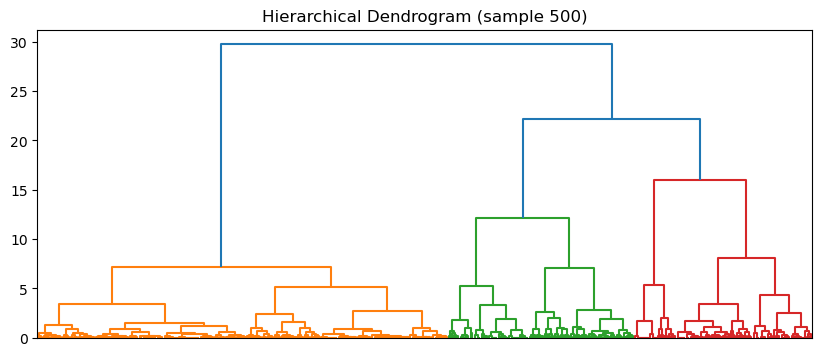

In [22]:
# ---- Step 3: Hierarchical Clustering ----
# Dendrogram on sample
sample = X_scaled[np.random.choice(X_scaled.shape[0], size=500, replace=False)]
Z = linkage(sample, method="ward")

plt.figure(figsize=(10, 4))
dendrogram(Z, no_labels=True)
plt.title("Hierarchical Dendrogram (sample 500)")
plt.show()

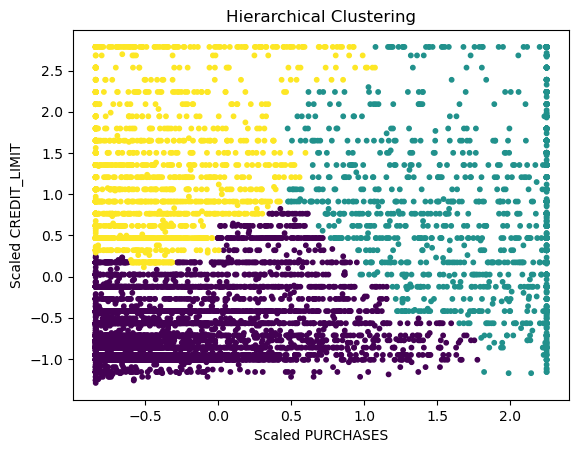

In [23]:
# Agglomerative clustering on full data
agg = AgglomerativeClustering(n_clusters=3, linkage="ward")
hier_labels = agg.fit_predict(X_scaled)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=hier_labels, s=10)
plt.title("Hierarchical Clustering")
plt.xlabel("Scaled PURCHASES")
plt.ylabel("Scaled CREDIT_LIMIT")
plt.show()

In [24]:
# ---- Step 4 & 5: KMeans + Best k ----
inertias, sil_scores = [], []
K = range(2, 11)

for k in K:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = km.fit_predict(X_scaled)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))

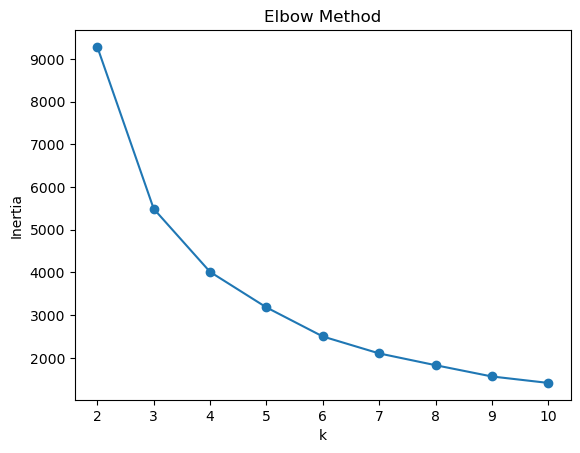

In [25]:
# Elbow plot
plt.plot(K, inertias, marker="o")
plt.title("Elbow Method")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.show()

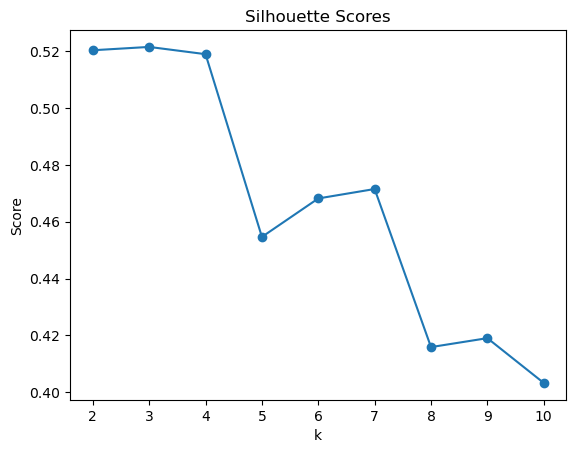

In [26]:
# Silhouette plot
plt.plot(K, sil_scores, marker="o")
plt.title("Silhouette Scores")
plt.xlabel("k")
plt.ylabel("Score")
plt.show()

In [27]:
# Best k
best_k = K[np.argmax(sil_scores)]
print("Best k:", best_k)

Best k: 3


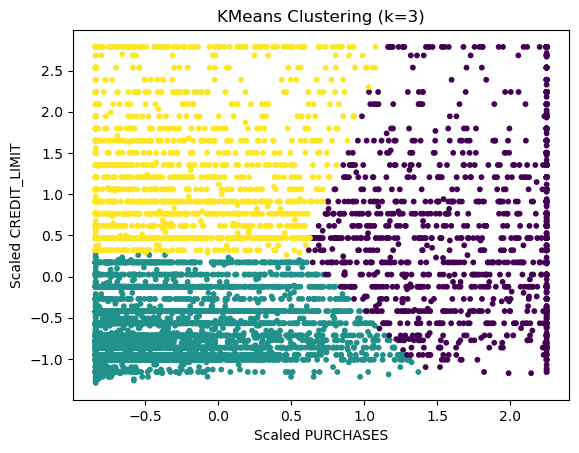

In [28]:
# Final KMeans
kmeans = KMeans(n_clusters=best_k, n_init=10, random_state=42)
km_labels = kmeans.fit_predict(X_scaled)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=km_labels, s=10)
plt.title(f"KMeans Clustering (k={best_k})")
plt.xlabel("Scaled PURCHASES")
plt.ylabel("Scaled CREDIT_LIMIT")
plt.show()

In [29]:
# ---- Step 6: Interpretation ----
centers_scaled = kmeans.cluster_centers_
centers_original = scaler.inverse_transform(centers_scaled)

for i, (p, c) in enumerate(centers_original):
    size = sum(km_labels == i)
    print(f"Cluster {i}: Purchases={p:.2f}, CreditLimit={c:.2f}, Size={size}")

Cluster 0: Purchases=2369.99, CreditLimit=6793.73, Size=1632
Cluster 1: Purchases=361.50, CreditLimit=2325.41, Size=5446
Cluster 2: Purchases=408.62, CreditLimit=8441.54, Size=1872


In [3]:
# ---- Step 1: Overview ----
print("Shape:", df.shape)
print("Missing per column:\n", df.isna().sum())
print(df.head())

# ---- Step 2: Data Preparation ----
# Fill missing CREDIT_LIMIT with median
df["CREDIT_LIMIT"] = df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].median())

# Cap outliers using IQR
def cap_outliers_iqr(series, factor=1.5):
    q1, q3 = series.quantile([0.25, 0.75])
    iqr = q3 - q1
    lower, upper = q1 - factor * iqr, q3 + factor * iqr
    return series.clip(lower, upper)

for col in ["BALANCE_FREQUENCY", "PURCHASES", "PAYMENTS", "CREDIT_LIMIT", "CASH_ADVANCE"]:
    df[col] = cap_outliers_iqr(df[col])

# Scale 2 features (PURCHASES & CREDIT_LIMIT)
X = df[["PURCHASES", "CREDIT_LIMIT"]].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---- Step 3: Hierarchical Clustering ----
# Dendrogram on sample
sample = X_scaled[np.random.choice(X_scaled.shape[0], size=500, replace=False)]
Z = linkage(sample, method="ward")

plt.figure(figsize=(10, 4))
dendrogram(Z, no_labels=True)
plt.title("Hierarchical Dendrogram (sample 500)")
plt.show()

# Agglomerative clustering on full data
agg = AgglomerativeClustering(n_clusters=3, linkage="ward")
hier_labels = agg.fit_predict(X_scaled)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=hier_labels, s=10)
plt.title("Hierarchical Clustering")
plt.xlabel("Scaled PURCHASES")
plt.ylabel("Scaled CREDIT_LIMIT")
plt.show()

# ---- Step 4 & 5: KMeans + Best k ----
inertias, sil_scores = [], []
K = range(2, 11)

for k in K:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = km.fit_predict(X_scaled)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))

# Elbow plot
plt.plot(K, inertias, marker="o")
plt.title("Elbow Method")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.show()

# Silhouette plot
plt.plot(K, sil_scores, marker="o")
plt.title("Silhouette Scores")
plt.xlabel("k")
plt.ylabel("Score")
plt.show()

# Best k
best_k = K[np.argmax(sil_scores)]
print("Best k:", best_k)

# Final KMeans
kmeans = KMeans(n_clusters=best_k, n_init=10, random_state=42)
km_labels = kmeans.fit_predict(X_scaled)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=km_labels, s=10)
plt.title(f"KMeans Clustering (k={best_k})")
plt.xlabel("Scaled PURCHASES")
plt.ylabel("Scaled CREDIT_LIMIT")
plt.show()

# ---- Step 6: Interpretation ----
centers_scaled = kmeans.cluster_centers_
centers_original = scaler.inverse_transform(centers_scaled)

for i, (p, c) in enumerate(centers_original):
    size = sum(km_labels == i)
    print(f"Cluster {i}: Purchases={p:.2f}, CreditLimit={c:.2f}, Size={size}")